
# **Video Streams and CCTV - RSTP and IP**

#### **In this lesson we'll learn how to import RTSP and IP Camera Streams in OpenCV**

### **RTSP Real Time Streaming Protocol**

RSPT is client-server multimedia presentation control protocol, designed to address the needs for efficient delivery of streamed multimedia over IP networks. The underlying protocol used for RTSP is RTP protocol.

RTSP was developed by RealNetworks, Netscape and Columbia University around 1996. It a protocol that is used for transferring real-time multimedia data (e.g audio/video) between client and a server. Usually a Client requests and server responds to the request with the data over this protocol. As it is a streaming protocol, with real time capability which means that the data is being simultaneously transferred and rendered in realtime. Here the multimedia data is encapsulated under Real-time Transport Protocol (RTP) packets. So its not RTSP who does the work, its the RTP. Most of the

![](https://upload.wikimedia.org/wikipedia/commons/3/38/Zuragb.jpg)

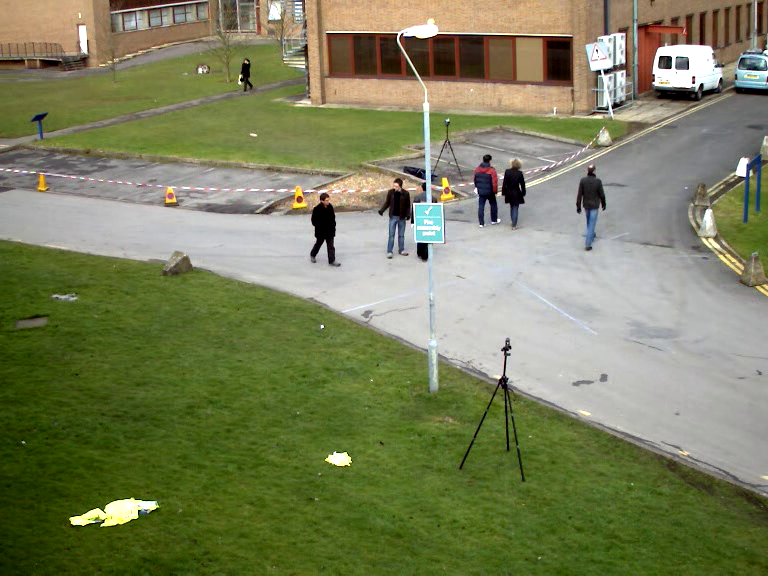

In [ ]:
# Install dependencies first
!wget https://raw.githubusercontent.com/opencv/opencv/master/samples/data/vtest.avi

import cv2
import numpy as np
from IPython.display import display, clear_output
import PIL.Image

def show_video():
    cap = cv2.VideoCapture('vtest.avi')  # Use local file

    if not cap.isOpened():
        print("Error: Could not open video file")
        return

    try:
        while True:
            ret, frame = cap.read()
            if not ret:
                print("Can't receive frame (stream end?). Exiting ...")
                break

            # Convert BGR to RGB
            rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

            # Convert to PIL Image
            pil_img = PIL.Image.fromarray(rgb_frame)

            # Display
            display(pil_img)
            clear_output(wait=True)

    finally:
        cap.release()

# Run the function
show_video()

In [ ]:
import cv2

cap = cv2.VideoCapture('vtest.avi')

if not cap.isOpened():
    print("Error: Could not open video file")
else:
    # Get video properties
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = cap.get(cv2.CAP_PROP_FPS)

    print(f"Video properties:")
    print(f"Width: {width}")
    print(f"Height: {height}")
    print(f"FPS: {fps}")

    # Read first frame
    ret, frame = cap.read()
    if ret:
        print("Successfully read first frame")
        print(f"Frame shape: {frame.shape}")
    else:
        print("Failed to read first frame")

cap.release()

In [ ]:
import cv2

# Our Free Test RSTP Link
# You can configure your CCTV IPTV Cameras to output a RSTP Stream
cap = cv2.VideoCapture("rtsp://184.72.239.149/vod/mp4:BigBuckBunny_175k.mov")

while(1):
    ret, frame = cap.read()

    cv2.imshow('RTSP Stream', frame)

    if cv2.waitKey(1) == 13: #13 is the Enter Key
        break

# Release camera and close windows
cap.release()
cv2.destroyAllWindows()

### **Interested in Ingesting Multiple IP Streams Easily? Look at ImageZMG**

- https://github.com/jeffbass/imagezmq#introduction
- https://www.pyimageconf.com/static/talks/jeff_bass.pdf

In [4]:
# You will need to install ImageZMQ first
!pip install imagezmq

In [1]:
# run this program on the Mac to display image streams from multiple RPis
import cv2
import imagezmq

image_hub = imagezmq.ImageHub()

while True:  # show streamed images until Ctrl-C
    rpi_name, image = image_hub.recv_image()
    cv2.imshow(rpi_name, image) # 1 window for each RPi
    cv2.waitKey(1)
    image_hub.send_reply(b'OK')